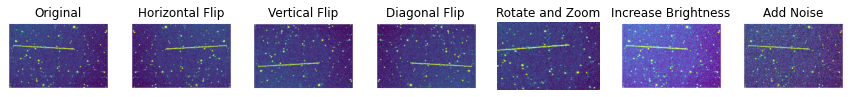

In [15]:
import os
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import random
import numpy as np

# Define augmentation functions
def flip_image(img, mode='horizontal'):
    """
    Flip the image in the specified mode.
    Modes:
    - 'horizontal': Flip left to right (default).
    - 'vertical': Flip top to bottom.
    - 'diagonal': Flip both horizontally and vertically.
    """
    if mode == 'horizontal':
        return img.transpose(Image.FLIP_LEFT_RIGHT)
    elif mode == 'vertical':
        return img.transpose(Image.FLIP_TOP_BOTTOM)
    elif mode == 'diagonal':
        return img.transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_TOP_BOTTOM)
    else:
        raise ValueError("Invalid mode. Use 'horizontal', 'vertical', or 'diagonal'.")

def rotate_and_zoom_image(img, angle=15, zoom_factor=1.2):
    """Rotate the image by a few degrees and adjust zoom to maintain proportions."""
    width, height = img.size
    img_rotated = img.rotate(angle, expand=True)
    rotated_width, rotated_height = img_rotated.size

    # Compute crop dimensions to maintain proportions after rotation
    x = int(rotated_width / zoom_factor)
    y = int(rotated_height / zoom_factor)
    img_cropped = img_rotated.crop(((rotated_width - x) // 2, (rotated_height - y) // 2, (rotated_width + x) // 2, (rotated_height + y) // 2))
    return img_cropped.resize((width, height), Image.LANCZOS)

def adjust_brightness(img, factor=1.5):
    """Adjust the brightness of the image."""
    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(factor)

def add_noise(img, noise_level=0.05):
    """Add random noise to the image."""
    img_array = np.asarray(img).astype(np.float32) / 255.0
    noise = np.random.normal(0, noise_level, img_array.shape)
    noisy_img_array = np.clip(img_array + noise, 0, 1) * 255
    noisy_img = Image.fromarray(noisy_img_array.astype(np.uint8))
    return noisy_img

# Visualization function
def plot_augmentations(original, augmentations):
    """Plot the original and augmented images side by side."""
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(augmentations) + 1, 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis('off')

    for i, (title, aug_img) in enumerate(augmentations, start=2):
        plt.subplot(1, len(augmentations) + 1, i)
        plt.imshow(aug_img)
        plt.title(title)
        plt.axis('off')

    plt.show()

# Load a test image
image_path = "./Data/fits_filtered2/tic6.png"  
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Test image not found at {image_path}")

img = Image.open(image_path)

# Apply augmentations
augmentations = [
    ("Horizontal Flip", flip_image(img, mode='horizontal')),
    ("Vertical Flip", flip_image(img, mode='vertical')),
    ("Diagonal Flip", flip_image(img, mode='diagonal')),
    ("Rotate and Zoom", rotate_and_zoom_image(img, angle=8, zoom_factor=1.5)),
    ("Increase Brightness", adjust_brightness(img, factor=1.5)),
    ("Add Noise", add_noise(img, noise_level=0.15))
]

plot_augmentations(img, augmentations)